### Practice Code for DataFrame

In [36]:
l1=[str(i) for i in range(1,256*256+1)]
l1.extend(['Folder'])
df=DataFrame(columns=l1)
df

,1,2,3,4,5,6,7,8,9,10,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,Folder


In [37]:
l2=list(range(256*256))
l2.extend(['hi'])

In [38]:
df.loc[len(df)]=l2
df

,1,2,3,4,5,6,7,8,9,10,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,Folder
0,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,hi


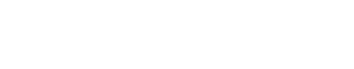

## Dataset which we have used is 
https://www.kaggle.com/datasets/emmarex/plantdisease

In [1]:
import numpy as np
import pickle
import cv2
from pandas import DataFrame
from os import listdir
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
#directory_root = '/input/plantvillage/'
directory_root = "D:/PlantVillage"
width=256
height=256
depth=3

In [3]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

## Data frame to take BW image vector 256*256

In [5]:
l1=[str(i) for i in range(1,256*256+1)]
#l1.extend(['Folder'])
df=DataFrame(columns=l1)
df

,1,2,3,4,5,6,7,8,9,10,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536


In [22]:
root_dir = listdir(directory_root)
root_dir

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [6]:
image_list, label_list = [], []
count_img=[]
pixel_vector=[]

try:
    print("Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        print('\n')
        print(f"Processing {plant_folder} ...")
        plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}")
        count_img.append(len(plant_disease_image_list))
        
        for image_sample in plant_disease_image_list :
            # remove .DS_Store from list
            if image_sample == ".DS_Store" :
                plant_disease_image_list.remove(image_sample)
                
        for image_directory in plant_disease_image_list[:200]:
            
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                
                image_path=f"{directory_root}/{plant_folder}/{image_directory}"
                image_list.append(convert_image_to_array(image_path))
                
                
                img = Image.open(image_path)
                label_list.append(plant_folder)
                
                # Convert the image to grayscale
                gray_img = img.convert('L')
                original_list = list(gray_img.getdata())
                # Divide each element by a specific value
                divisor = 255
                result_list = [round(element/divisor,3) for element in original_list]
                pixel_vector.append(result_list)
                #result_list.extend([plant_folder])
                
                df.loc[len(df)]=result_list
                                            
                
         
    print("\nFirst Step Done\nImage loading completed")  
except Exception as e:
    print(f"Error : {e}")

Loading images ...


Processing Pepper__bell___Bacterial_spot ...


Processing Pepper__bell___healthy ...


Processing Potato___Early_blight ...


Processing Potato___healthy ...


Processing Potato___Late_blight ...


Processing Tomato_Bacterial_spot ...


Processing Tomato_Early_blight ...


Processing Tomato_healthy ...


Processing Tomato_Late_blight ...


Processing Tomato_Leaf_Mold ...


Processing Tomato_Septoria_leaf_spot ...


Processing Tomato_Spider_mites_Two_spotted_spider_mite ...


Processing Tomato__Target_Spot ...


Processing Tomato__Tomato_mosaic_virus ...


Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...

First Step Done
Image loading completed


In [7]:
df

,1,2,3,4,5,6,7,8,9,10,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
0,0.388,0.365,0.486,0.400,0.475,0.447,0.349,0.451,0.431,0.427,...,0.588,0.608,0.584,0.608,0.608,0.588,0.588,0.620,0.639,0.635
1,0.518,0.525,0.541,0.529,0.514,0.502,0.494,0.498,0.529,0.565,...,0.502,0.502,0.506,0.580,0.494,0.620,0.388,0.588,0.553,0.471
2,0.576,0.439,0.094,0.094,0.090,0.055,0.031,0.082,0.063,0.063,...,0.753,0.745,0.769,0.769,0.773,0.773,0.769,0.761,0.753,0.749
3,0.043,0.043,0.039,0.035,0.031,0.031,0.031,0.035,0.024,0.024,...,0.420,0.667,0.686,0.651,0.616,0.753,0.675,0.737,0.443,0.690
4,0.671,0.667,0.659,0.651,0.643,0.639,0.631,0.631,0.635,0.627,...,0.471,0.431,0.388,0.337,0.396,0.451,0.427,0.318,0.412,0.388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,0.635,0.592,0.573,0.596,0.600,0.569,0.557,0.576,0.624,0.576,...,0.396,0.373,0.392,0.373,0.325,0.380,0.322,0.310,0.431,0.333
2948,0.463,0.322,0.349,0.431,0.337,0.537,0.416,0.439,0.502,0.427,...,0.569,0.561,0.553,0.569,0.573,0.561,0.561,0.580,0.592,0.592
2949,0.475,0.494,0.522,0.447,0.553,0.514,0.518,0.459,0.565,0.533,...,0.627,0.573,0.596,0.592,0.612,0.631,0.608,0.569,0.573,0.616
2950,0.588,0.580,0.573,0.569,0.565,0.573,0.580,0.584,0.588,0.580,...,0.416,0.427,0.388,0.416,0.416,0.392,0.396,0.427,0.431,0.408


df.to_excel('your_file.xlsx', index=False)

## Transform Image Labels uisng LabelBinarizer

In [8]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
#pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print('Number of Classes ',n_classes)

# Print the classes
print('\nClasses are\n',label_binarizer.classes_)

Number of Classes  15

Classes are
 ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


## To scale the image vector values between 0 and 1

In [9]:
np_img_list=np.array(image_list, dtype=np.float16) / 255.0

## Splitting Data into Train and Test

In [23]:
x_train, x_test, y_train, y_test = train_test_split(np_img_list, image_labels, test_size=0.2, random_state = 42) 

In [25]:
print('Dimesions are as follows:\nx_train ',x_train.shape,'\ny_train ',
      y_train.shape,'\nx_test ',x_test.shape,'\ny_test ',y_test.shape)

Dimesions are as follows:
x_train  (2361, 256, 256, 3) 
y_train  (2361, 15) 
x_test  (591, 256, 256, 3) 
y_test  (591, 15)


In [12]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2,
                         zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [13]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [15]:
opt = Adam(lr=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [16]:
history = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),validation_data=(x_test, y_test),
                              steps_per_epoch=len(x_train) // BS,epochs=EPOCHS, verbose=1)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16292\1388483230.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),validation_data=(x_test, y_test),


Epoch 1/25



69/69 [==============================] - 219s 3s/step - loss: 0.6761 - accuracy: 0.2062 - val_loss: 0.4433 - val_accuracy: 0.0583
Epoch 2/25
69/69 [==============================] - 194s 3s/step - loss: 0.3420 - accuracy: 0.2397 - val_loss: 1.3017 - val_accuracy: 0.0664
Epoch 3/25
69/69 [==============================] - 194s 3s/step - loss: 0.2232 - accuracy: 0.3841 - val_loss: 0.5546 - val_accuracy: 0.0718
Epoch 4/25
69/69 [==============================] - 158s 2s/step - loss: 0.1699 - accuracy: 0.5417 - val_loss: 2.0305 - val_accuracy: 0.1057
Epoch 5/25
69/69 [==============================] - 123s 2s/step - loss: 0.1545 - accuracy: 0.5866 - val_loss: 1.4136 - val_accuracy: 0.0745
Epoch 6/25
69/69 [==============================] - 120s 2s/step - loss: 0.1297 - accuracy: 0.6586 - val_loss: 1.1419 - val_accuracy: 0.1070
Epoch 7/25
69/69 [==============================] - 120s 2s/step - loss: 0.1211 - accuracy: 0.6842 - val_loss: 0.4485 - val_accuracy: 0.2182
Epoch 8/25
69/69 [======

In [29]:
m=model.predict(x_test)

19/19 [==============================] - 8s 431ms/step


In [48]:
[round(i,2) for i in list(m[5])]

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

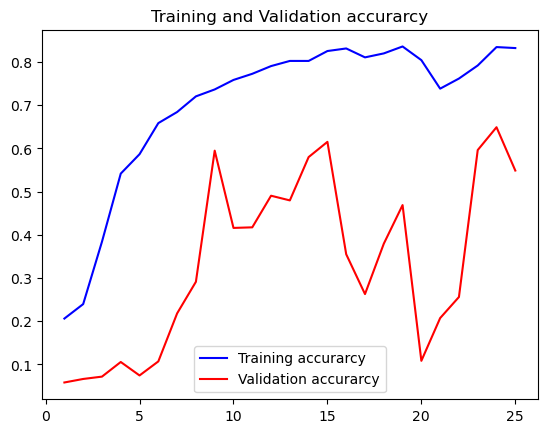

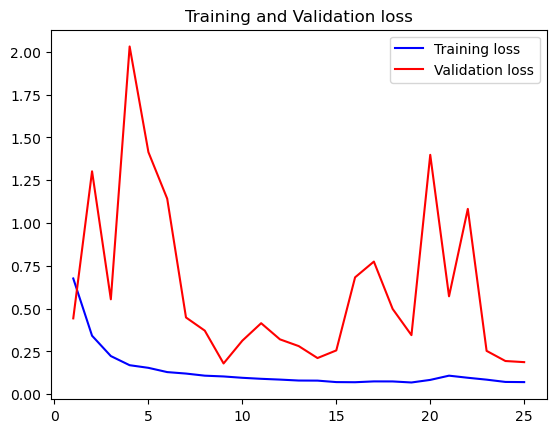

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [18]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
19/19 [==============================] - 10s 470ms/step - loss: 0.2839 - accuracy: 0.5431
Test Accuracy: 54.31472063064575


## Code to save the model in system

In [17]:
from tensorflow import keras
model.save('cnn_model.h5')

C:\Users\nmims.student\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
from keras.models import load_model
loaded_model = load_model('cnn_model_tn.h5')

In [19]:
print("[INFO] Calculating model accuracy")
scores =model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 8s 314ms/step - loss: 0.1676 - accuracy: 0.7344
Test Accuracy: 73.44173192977905


In [ ]:
# extra dense 1024


In [26]:
model2 = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

model2.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))

model2.add(Conv2D(64, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(128, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))


model2.add(Conv2D(128, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())


model2.add(Dense(1024))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Dense(1024))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.45))


model2.add(Dense(n_classes))
model2.add(Activation("softmax"))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_6 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 85, 85, 64)       

In [28]:
opt = Adam(lr=INIT_LR)
model2.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [29]:
history2 = model2.fit_generator(aug.flow(x_train, y_train, batch_size=BS),validation_data=(x_test, y_test),
                              steps_per_epoch=len(x_train) // BS,epochs=EPOCHS, verbose=1)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16292\2447241474.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(aug.flow(x_train, y_train, batch_size=BS),validation_data=(x_test, y_test),


Epoch 1/25
73/73 [==============================] - 135s 2s/step - loss: 0.7316 - accuracy: 0.1537 - val_loss: 1.0158 - val_accuracy: 0.0677
Epoch 2/25
73/73 [==============================] - 127s 2s/step - loss: 0.3312 - accuracy: 0.2847 - val_loss: 0.6985 - val_accuracy: 0.0812
Epoch 3/25
73/73 [==============================] - 125s 2s/step - loss: 0.1999 - accuracy: 0.4762 - val_loss: 0.5790 - val_accuracy: 0.0846
Epoch 4/25
73/73 [==============================] - 125s 2s/step - loss: 0.1632 - accuracy: 0.5625 - val_loss: 0.6623 - val_accuracy: 0.0558
Epoch 5/25
73/73 [==============================] - 125s 2s/step - loss: 0.1324 - accuracy: 0.6432 - val_loss: 0.3523 - val_accuracy: 0.1607
Epoch 6/25
73/73 [==============================] - 124s 2s/step - loss: 0.1240 - accuracy: 0.6801 - val_loss: 0.3747 - val_accuracy: 0.2115
Epoch 7/25
73/73 [==============================] - 124s 2s/step - loss: 0.1187 - accuracy: 0.6878 - val_loss: 0.4494 - val_accuracy: 0.1760
Epoch 8/25
73

In [30]:
from tensorflow import keras
model2.save('cnn_model_hk.h5')

C:\Users\Harsh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model3 = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

model3.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Dropout(0.25))

#model3.add(Conv2D(64, (3, 3), padding="same"))
#model3.add(Activation("relu"))
#model3.add(BatchNormalization(axis=chanDim))

model3.add(Conv2D(64, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


model3.add(Conv2D(128, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))


model3.add(Conv2D(128, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())


model3.add(Dense(1024))
model3.add(Activation("relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))

model3.add(Dense(1024))
model3.add(Activation("relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.45))


model3.add(Dense(n_classes))
model3.add(Activation("softmax"))

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_13 (Ba  (None, 256, 256, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 85, 85, 64)       

In [34]:
opt = Adam(lr=INIT_LR)
model3.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [36]:
history3 = model3.fit_generator(aug.flow(x_train, y_train, batch_size=BS),validation_data=(x_test, y_test),
                              steps_per_epoch=len(x_train) // BS,epochs=EPOCHS, verbose=1)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16292\2447484730.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(aug.flow(x_train, y_train, batch_size=BS),validation_data=(x_test, y_test),


Epoch 1/25
73/73 [==============================] - 128s 2s/step - loss: 0.7358 - accuracy: 0.1752 - val_loss: 0.7839 - val_accuracy: 0.0541
Epoch 2/25
73/73 [==============================] - 121s 2s/step - loss: 0.3351 - accuracy: 0.3126 - val_loss: 0.5064 - val_accuracy: 0.0338
Epoch 3/25
73/73 [==============================] - 118s 2s/step - loss: 0.1918 - accuracy: 0.4933 - val_loss: 0.9252 - val_accuracy: 0.0626
Epoch 4/25
73/73 [==============================] - 114s 2s/step - loss: 0.1543 - accuracy: 0.5874 - val_loss: 1.0979 - val_accuracy: 0.0626
Epoch 5/25
73/73 [==============================] - 113s 2s/step - loss: 0.1425 - accuracy: 0.6179 - val_loss: 0.5675 - val_accuracy: 0.0728
Epoch 6/25
73/73 [==============================] - 113s 2s/step - loss: 0.1267 - accuracy: 0.6617 - val_loss: 0.8617 - val_accuracy: 0.0846
Epoch 7/25
73/73 [==============================] - 113s 2s/step - loss: 0.1105 - accuracy: 0.7020 - val_loss: 0.2633 - val_accuracy: 0.3469
Epoch 8/25
73

In [37]:
from tensorflow import keras
model3.save('cnn_model_hk_1.h5')

## Let's proceed with ML algorithms

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df, image_labels, test_size=0.25, random_state = 42) 

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, Y_train)  #Model fitting on training data set
#y_predxg_test = xg.predict(X_test) #Prediction using trained model on testing data set
#y_predxg_train = xg.predict(X_train) #Prediction using trained model on training data set